<div style="text-align: center; background-color: #750E21; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  FINAL PROJECT: RESEARCHING ON HOTEL BOOKING DEMAND 📌
</div>

<div style="text-align: center; background-color: #0766AD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 02 - Preprocessing 📌
</div>

## **IMPORT LIBRARY** 🎄

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## **OVERAL INSIGHT INTO DATA** 📝

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  1. Read raw data 🔥
</div>

In [93]:
pd.set_option('display.max_columns', None)
raw_df = pd.read_csv('./data/raw.csv')
raw_df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


## **LET'S PROCESS** 📝

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  3. Does the raw data have duplicate rows? 🧮
</div>

In [94]:
num_duplicated_rows = raw_df.duplicated().sum()
print(f'Number of duplicated rows: {num_duplicated_rows}')

Number of duplicated rows: 31994


In [95]:
duplicate_rows = raw_df[raw_df.duplicated()]
duplicate_rows

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
5,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250,NULL,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250,NULL,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240,NULL,0,Transient,97.00,0,0,Canceled,2015-07-01
200,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [96]:
raw_df = raw_df.drop_duplicates()

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding-left: 20px; padding-bottom:10px;padding-top:10px;font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  5.  What data type does each column currently have? 🧮
</div>
<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding-left: 20px; padding-bottom:20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
      Are there any columns whose data types are not suitable for further processing? 🧮
</div>

👀 We will take a look at the data type of each column

In [97]:
raw_df.dtypes

IsCanceled                       int64
LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                       float64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
Agent                           object
Company                         object
DaysInWaitingList                int64
CustomerType             

When looking through the data, we found that at object data type columns, the data which is null is saved by 'NULL' string. This will cause problems when we calculate missing ratios so we will replace these values with NULL value.

In [102]:
raw_df.replace('       NULL', '', inplace=True)
raw_df

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,,,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,,,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,,,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,,0,Transient,104.40,0,0,Check-Out,2017-09-07


👀 To have a clearer understanding of the columns with object type, we will analyse into smaller type.

In [103]:
def open_object_dtype(s):
    dtypes = set()
    dtypes.update(s.apply(type))
    return dtypes

raw_df[raw_df.dtypes.index[raw_df.dtypes == object]].apply(open_object_dtype)

ArrivalDateMonth                          {<class 'str'>}
Meal                                      {<class 'str'>}
Country                  {<class 'float'>, <class 'str'>}
MarketSegment                             {<class 'str'>}
DistributionChannel                       {<class 'str'>}
ReservedRoomType                          {<class 'str'>}
AssignedRoomType                          {<class 'str'>}
DepositType                               {<class 'str'>}
Agent                                     {<class 'str'>}
Company                                   {<class 'str'>}
CustomerType                              {<class 'str'>}
ReservationStatus                         {<class 'str'>}
ReservationStatusDate                     {<class 'str'>}
dtype: object

### 📈 Some comments:
- Most of the columns has the correct data type.
- The `IsCancelled`, `IsRepeatedGuest` columns should be in bool data type.
- The `ReservationStatusDate` column should be in date-time data type.
- The `Childrean` column should be in integer data type.
- The `Country` column should be in string data type.

| Feature | Correct data type | 
|:--------:|:--------:|
|  `IsCanceled`   |  False (convert to bool)   |
|  `LeadTime`   |  True   |
|  `ArrivalDateYear`   |  True   |
|  `ArrivalDateMonth`   |  True  |
|  `ArrivalDateWeekNumber`   |  True   |
|  `ArrivalDateDayOfMonth`   |  True   |
|  `StaysInWeekendNights`   |  True   |
|  `StaysInWeekNights`   |  True   |
|  `Adults`   |  True   |
|  `Children`   |  False (convert to int)   |
|  `Babies`   |  True   |
|  `Meal`   |  True   |
|  `Country`   |  False (convert to string)   |
|  `MarketSegment`   |  True   |
|  `DistributionChannel`   |  True   |
|  `IsReatedGuest`   |  False (convert to bool)   |
|  `PreviousCancellations`   |  True   |
|  `PreviousBookingsNotCancelled`   |  True   |
|  `ReservedRoomType`   |  True   |
|  `AssignedRoomType`   |  True   |
|  `BookingChanges`   |  True   |
|  `DepositType`   |  True   |
|  `Agent`   |  True   |
|  `Company`   |  True   |
|  `DaysInWaitingList`   |  True   |
|  `CustomerType`   |  True   |
|  `ADR`   |  True   |
|  `RequiredCarParkingSpaces`   |  True   |
|  `TotalOfSpecialRequests`   |  True   |
|  `ReservationStatus`   |  True   |
|  `ReservationStatusDate`   |  False (convert to date-time)   |

- So let's convert our data into their correct data type.

In [104]:
# Convert to date-time
raw_df['ReservationStatusDate'] = pd.to_datetime(raw_df['ReservationStatusDate'], format='%Y-%m-%d')

# Convert to bool
raw_df['IsCanceled'] = raw_df['IsCanceled'].astype(bool)
raw_df['IsRepeatedGuest'] = raw_df['IsRepeatedGuest'].astype(bool)

# Convert to int
raw_df['Children'] = raw_df['Children'].astype('Int64')

#Convert to string
raw_df['Country'] = raw_df['Country'].replace(to_replace=np.nan, value='')

👀 After converting our data to their correct type, let's take a look again of the data types.

In [105]:
raw_df.apply(open_object_dtype)

IsCanceled                                                      {<class 'bool'>}
LeadTime                                                         {<class 'int'>}
ArrivalDateYear                                                  {<class 'int'>}
ArrivalDateMonth                                                 {<class 'str'>}
ArrivalDateWeekNumber                                            {<class 'int'>}
ArrivalDateDayOfMonth                                            {<class 'int'>}
StaysInWeekendNights                                             {<class 'int'>}
StaysInWeekNights                                                {<class 'int'>}
Adults                                                           {<class 'int'>}
Children                       {<class 'int'>, <class 'pandas._libs.missing.N...
Babies                                                           {<class 'int'>}
Meal                                                             {<class 'str'>}
Country                     

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FFC436; padding-left: 15px; font-size: 18px; font-weight: bold; border-radius: 0 0 0 0">
Our data is now in their correct types. 🎊🎊🎊
</div>

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  6. For each column with numeric and date-time data type, how are the values distributed ? 🧮
</div> 

❄️  For columns with numeric data types, we will calculate:   
- `Percentage` (from 0 to 100) of missing values
- The `min`
- The `lower quartile` (phân vị 25)
- The `median` (phân vị 50)
- The `upper quartile` (phân vị 75)
- The `max`

❄️  First we need to select columns with numeric and date-time data type.

In [106]:
num_col_info_df = raw_df.select_dtypes(include=['number', 'datetime'])
num_col_info_df = pd.DataFrame(num_col_info_df)

❄️  Then we calculate the descriptive statistics and show the values.

In [107]:
missing_ratio = num_col_info_df.isna().mean() * 100
min = num_col_info_df.quantile(0)
lower_quartile = num_col_info_df.quantile(0.25)
median = num_col_info_df.quantile(0.5)
upper_quartile = num_col_info_df.quantile(0.75)
max = num_col_info_df.quantile(1)

In [108]:
num_col_info_df = pd.DataFrame(data=[missing_ratio, min, lower_quartile, median, upper_quartile, max],
                               index=['Missing Ratios', 'Min', 'Lower Quartile', 'Median', 'Upper Quartile', 'Max'],
                               columns=num_col_info_df.columns)
num_col_info_df

,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate
Missing Ratios,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004577,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
Min,0.0,2015.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-6.38,0.0,0.0,2014-10-17 00:00:00
Lower Quartile,11.0,2016.0,16.0,8.0,0.0,1.0,2.0,0.000000,0.0,0.0,0.0,0.0,0.0,72.00,0.0,0.0,2016-03-18 00:00:00
Median,49.0,2016.0,27.0,16.0,1.0,2.0,2.0,0.000000,0.0,0.0,0.0,0.0,0.0,98.10,0.0,0.0,2016-09-08 00:00:00
Upper Quartile,125.0,2017.0,37.0,23.0,2.0,4.0,2.0,0.000000,0.0,0.0,0.0,0.0,0.0,134.00,0.0,1.0,2017-03-05 00:00:00
Max,737.0,2017.0,53.0,31.0,19.0,50.0,55.0,10.000000,10.0,26.0,72.0,21.0,391.0,5400.00,8.0,5.0,2017-09-14 00:00:00


### 📈 Some comments:
- The missing ratios for numeric and datetime columns are pretty low. Only `children` column has missing data, the other columns don't have. This missing data can be due to the data collecting step.
- For column `Children`, `Babies`, `PreviousCancellations`, `PreviousBookingNotCanceled`, `BookingChanges`, `DaysInWaitingList`, `RequiredCarParkingSpaces` and `TotalOfSpecialRequests`, the min, lower quartile, median and upper quartile are all 0, which means that most of the data in these columns are 0.
    - The data of `Children` and `Babies` containing most of 0 means that there's not many family travelling with their childrens or babies.
    - The data of `RequiredCarParkingSpaces` containing most of 0 means that many families travelled without using cars. 
    - For `PreviousCancellations`, maybe the guests were new to the hotel or maybe this shows for the high quality of the hotel since many of their guests hadn't make any cancellation.
    - For `DaysInWaitingList`, this shows for the professional of the hotel since many of their guests didn't have to wait.
- Most of the columns have the max value pretty high compared to the upper quartile value. Some can be considered as outliers.
- The min and max value of `ReservationStatusDate` column shows that the data was collected from 17/10/2014 to 14/09/2017. This is reasonable since the min and max of `ArrivalDateYear` are also 2015 and 2017 respectively.


👀  Now let's take a look at columns with wide range of value. We will consider `LeadTime`, `ArrivalDateWeekNumber`, `ArrivalDateDayOfMonth` and `ADR`. 

Text(0.5, 0, 'ADR')

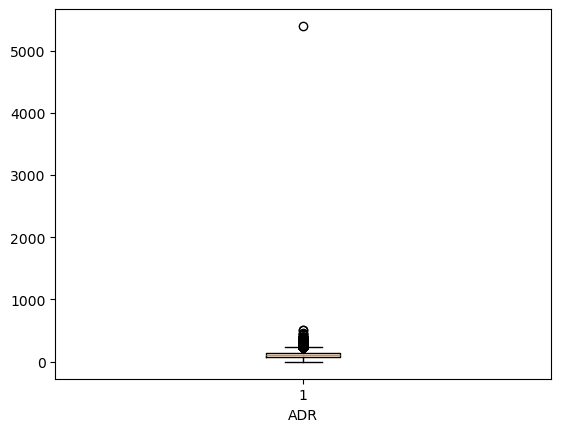

In [109]:
plt.boxplot(raw_df['ADR'])
plt.xlabel('ADR')

There's a outlier that has the value very high compared to other points so we will limit the y-axis.

Text(0.5, 0, 'ADR')

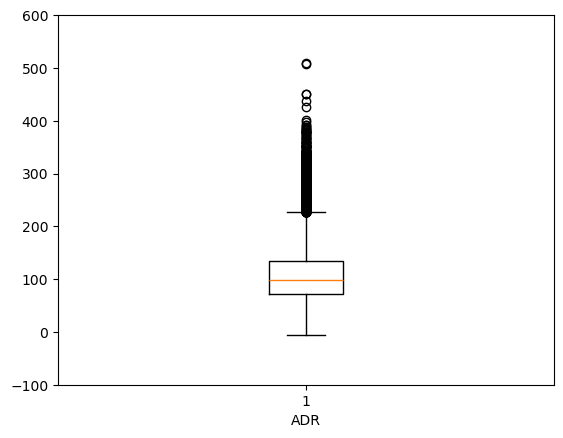

In [110]:
plt.boxplot(raw_df['ADR'])
plt.ylim(-100, 600)
plt.xlabel('ADR')

🔍 Based on the boxplot, 50% of the data converge around 100 points. There's a lot of outliers converge from 250 to 550 points. The value for min is approximately 0 and for max is approximately 250 (we don't consider outliers here).   
🔍 The median value is approximately 100 points.   

👀 And let's see how many outliers we have.

In [111]:
def count_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

In [112]:
count_outliers(raw_df['ADR'])

2490

There are 2490 outliers for `ADR` column. This number of outliers seems pretty high but when compared to the size of the data, this is pretty small.

👀 Next we will plot data of `ArrivalDateWeekNumber` and `ArrivalDateDayOfMonth`.

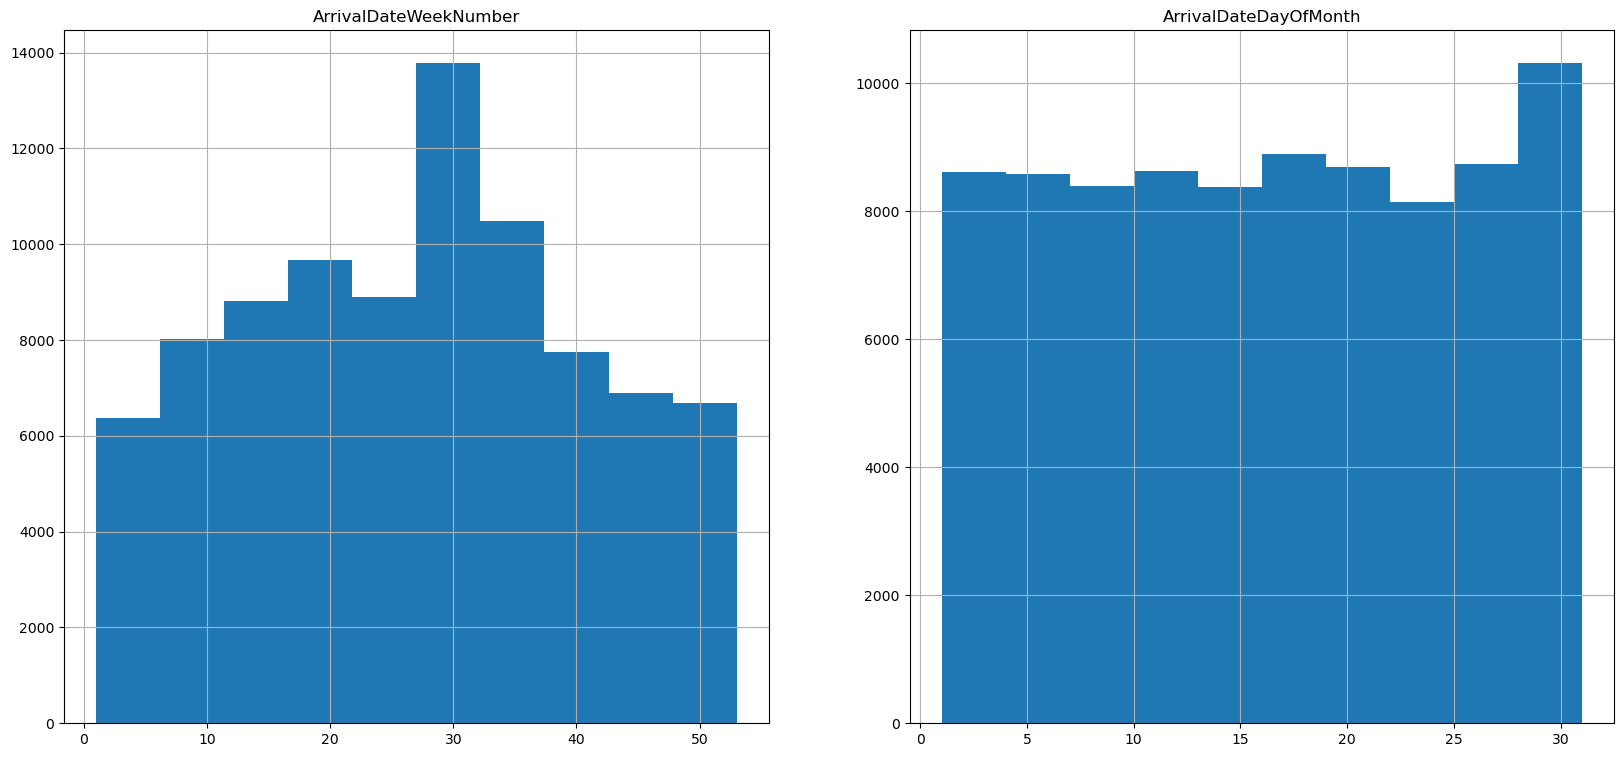

In [113]:
# Create fig and axes
fig, axes = plt.subplots(1, 2, figsize=(20, 9))
axes = axes.flatten()

# Plot histograms for each axe
axes[0].hist(raw_df['ArrivalDateWeekNumber'])
axes[0].set_title('ArrivalDateWeekNumber')
axes[0].grid()

axes[1].hist(raw_df['ArrivalDateDayOfMonth'])
axes[1].set_title('ArrivalDateDayOfMonth')
axes[1].grid()

plt.show()

🔍 Based on the histograms, we can see that the data of `ArrivalDateDayOfMonth` distributes evenly from above 0 to approximately 30. The highest distribution for this column is around 30 means that people are likely to travel during the end of month (approximately 10000 bookings on day 30).   
🔍 For `ArrivalDateWeekNumber`, people likely to travel during week 30 of the year which is the middle of the year (approximately 14000 bookings). The distributions of other weeks are pretty even.

👀 Continue for the `LeadTime`

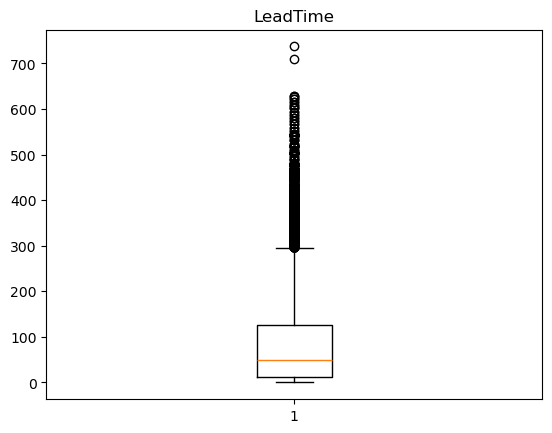

In [114]:
plt.boxplot(raw_df['LeadTime'])
plt.title('LeadTime')
plt.show()

🔍  More than 50% of the data converge from 0 to more than 100 with the median value aroung 50 days.   
🔍  Min and max of the `LeadTime` are approximately 0 and more than 700 days respectively.   
🔍  The outliers have the value much higher than other values with more than 300 days of `LeadTime`.

In [115]:
count_outliers(raw_df['LeadTime'])

2396

🔍  The number of outliers of `LeadTime` is approximately to that of `ADR`.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  7. For each column with a non-numeric data type, how are the values distributed ? 🧮
</div> 

🌸 For columns with non-numeric data types, we calculate:

✨ Percentage (from 0 to 100) of missing values.\
✨ Number of values (the values here are different values and we do not consider missing values): with columns whose type is categorical, it is a set with a finite number of categories. Directly counting the number of values in these columns doesn't make much sense, so it's better to count the number of elements of all types.\
(Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu): với cột mà có kiểu là categorical, nó là một tập hợp có số lượng hữu hạn các loại. Việc đếm trực tiếp số lượng các giá trị trong những cột này không có nhiều ý nghĩa, nên tốt hơn hết là mà sẽ đếm số lượng phần tử các loại).\
✨ The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values): you use a dictionary to store , key is the value, value is the percentage; With the column corresponding to each type, the method is similar to above.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #E7B10A; padding-left: 25px; font-size: 20px; font-weight: bold; border-radius: 0 0 0 0">
  7.1. With classified data types:
</div>

🌸 For this part, we will consider bool data type only since our data doesn't have column represents for Id.

✨ First, let's extract the columns with bool data type.

In [116]:
bool_col_df = raw_df[['IsCanceled', 'IsRepeatedGuest']]

✨ We will calculate missing ratios, number of different values and those values.

In [117]:
# Calculate missing ratios, number of different values and those values
missing_ratio = bool_col_df.isna().mean() * 100
num_diff_vals = bool_col_df.nunique().to_numpy()
value_counts_dict = np.vectorize(lambda column: dict(bool_col_df[column].value_counts()))(bool_col_df.columns)

# Create a dataframe to show data
bool_col_profile = pd.DataFrame({'missing_ratio': missing_ratio,
                                 'num_diff_vals': num_diff_vals, 
                                 'distribution': value_counts_dict})
bool_col_profile = bool_col_profile.transpose()
bool_col_profile.columns = ['IsCanceled', 'IsRepeatedGuest']

# Show data
bool_col_profile

,IsCanceled,IsRepeatedGuest
missing_ratio,0.0,0.0
num_diff_vals,2,2
distribution,"{False: 63371, True: 24025}","{False: 83981, True: 3415}"


🔍 These two columns don't have missing data which is a great thing.   
🔍 There are 2 values for both columns, True and False.   
🔍 The number of False value is much higher than that of True value on both columns.

👀 Let's plot the data for clearer understanding.

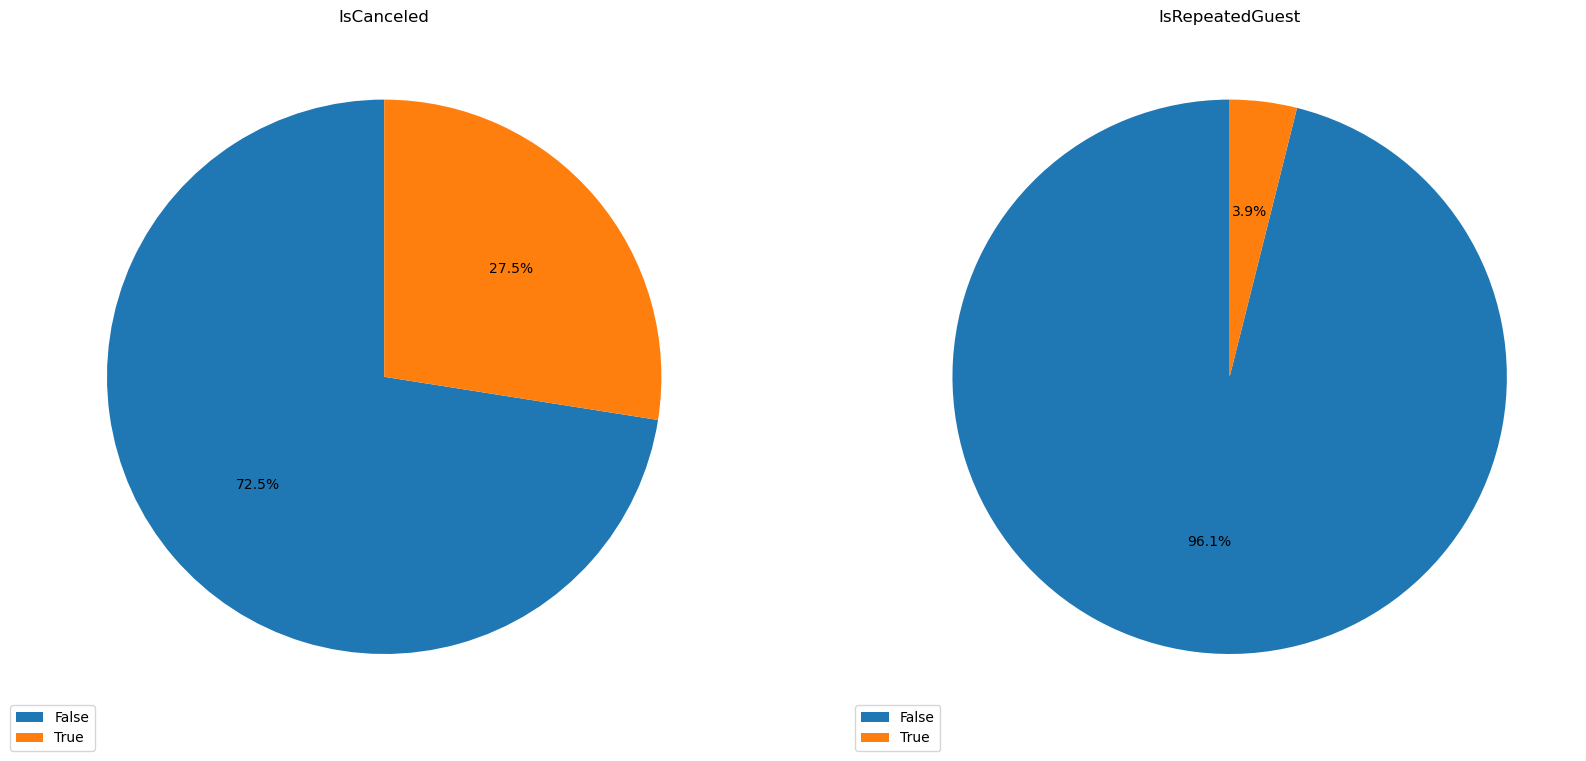

In [118]:
# Create fig and axes
fig, axes = plt.subplots(1, 2, figsize=(20, 9))
axes = axes.flatten()

# Define column names
cols = ['IsCanceled', 'IsRepeatedGuest']

# Plot histograms for each axe
for i in range(2):
    data_dict = raw_df[cols[i]].value_counts().to_dict()
    labels = list(data_dict.keys())
    sizes = list(data_dict.values())
    
    axes[i].pie(sizes, labels=None, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(cols[i])
    axes[i].set_aspect('equal')
    axes[i].legend(labels, loc='lower left', bbox_to_anchor=(-0.05, -0.05))

plt.show()

There's nothing abnormal in our bool data columns 🎊🎊🎊.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #E7B10A; padding-left: 25px; font-size: 20px; font-weight: bold; border-radius: 0 0 0 0">
  7.2. With string data type:
</div>

🌸 For string data type, we will calculate missing ratios, number of different values and those values.

✨ First we will extract these columns.

In [119]:
str_df = raw_df.select_dtypes(include=['object'])
str_df

,ArrivalDateMonth,Meal,Country,MarketSegment,DistributionChannel,ReservedRoomType,AssignedRoomType,DepositType,Agent,Company,CustomerType,ReservationStatus
0,July,BB,PRT,Direct,Direct,C,C,No Deposit,,,Transient,Check-Out
1,July,BB,PRT,Direct,Direct,C,C,No Deposit,,,Transient,Check-Out
2,July,BB,GBR,Direct,Direct,A,C,No Deposit,,,Transient,Check-Out
3,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,304,,Transient,Check-Out
4,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,240,,Transient,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,394,,Transient,Check-Out
119386,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,9,,Transient,Check-Out
119387,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,9,,Transient,Check-Out
119388,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,89,,Transient,Check-Out


✨ Then we will calculate missing ratios and different values.

In [121]:
# Calculate for missing values
missing_ratio = (str_df == '').mean()

# Calculate for different values
num_diff_vals = str_df.nunique().to_numpy()
value_counts_dict = np.vectorize(lambda column: dict(str_df[column].value_counts()))(str_df.columns)

# Create dataframe to show values
string_profile = pd.DataFrame({'missing_ratio': missing_ratio,
                                'num_diff_vals': num_diff_vals, 
                                'distribution': value_counts_dict})
string_profile = string_profile.transpose()
string_profile.columns = str_df.columns

In [122]:
string_profile

,ArrivalDateMonth,Meal,Country,MarketSegment,DistributionChannel,ReservedRoomType,AssignedRoomType,DepositType,Agent,Company,CustomerType,ReservationStatus
missing_ratio,0.0,0.0,0.005172,0.0,0.0,0.0,0.0,0.0,0.139514,0.939826,0.0,0.0
num_diff_vals,12,5,178,8,5,10,12,3,334,353,4,3
distribution,"{'August': 11257, 'July': 10057, 'May': 8355, ...","{'BB ': 67978, 'SC ': 9481, 'HB ...","{'PRT': 27453, 'GBR': 10433, 'FRA': 8837, 'ESP...","{'Online TA': 51618, 'Offline TA/TO': 13889, '...","{'TA/TO': 69141, 'Direct': 12988, 'Corporate':...","{'A ': 56552, 'D '...","{'A ': 46313, 'D '...","{'No Deposit ': 86251, 'Non Refund ': ...","{' 9': 28759, ' 240': 13028, '...","{'': 82137, ' 40': 851, ' 223':...","{'Transient': 71986, 'Transient-Party': 11727,...","{'Check-Out': 63371, 'Canceled': 23011, 'No-Sh..."


🔍 There are 3 columns that have missing values.   
$\;\;\;\;\;\;$✨ `Country` has a very small amount of missing values.   
$\;\;\;\;\;\;$✨ `Company` has a very high amount of missing values, this means that many customers didn't choose to book hotel through a company. So we can consider to remove this column.   
$\;\;\;\;\;\;$✨ `Agent` has 0.139514 percent of missing ratio.   
🔍 `Country`, `Agent` and `Company` are columns with the most variety of unique values (178, 334 and 353 respectively).
🔍 `ArrivalDateMonth` has 12 unique values represent for 12 months of the year which is reasonable.   
🔍 `ReservedRoomType` and `AssignedRoomType` have diffrent number of unique values meaning that there are customers who have been assigned to different rooms from their reserved rooms.   

So we will remove column `Company` from our data

In [123]:
raw_df.drop('Company', axis=1, inplace=True)
str_df.drop('Company', axis=1, inplace=True)

👀 Now let's visualize the data.

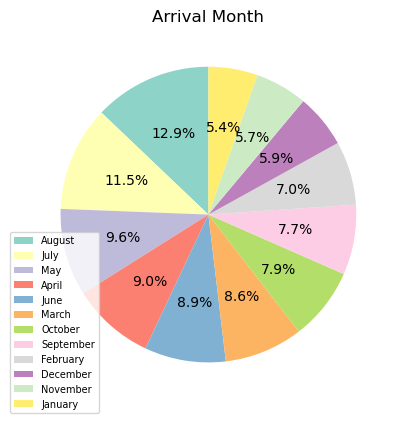

In [150]:
# Take out month data
months = str_df['ArrivalDateMonth'].value_counts().to_dict()
labels = list(months.keys())
sizes = list(months.values())

# Define colors
colors = plt.cm.Set3.colors

# Plot pie chart
plt.pie(sizes, labels=None, autopct='%1.1f%%', colors=colors, startangle=90, radius=1)
plt.title('Arrival Month')
plt.legend(labels, loc='lower left', bbox_to_anchor=(-0.05, -0.05), prop={'size': 7})
plt.show()

✨ Among all months of the year, August, July and May are the months with the highest bookings.   
✨ January is the month with the least number of bookings.

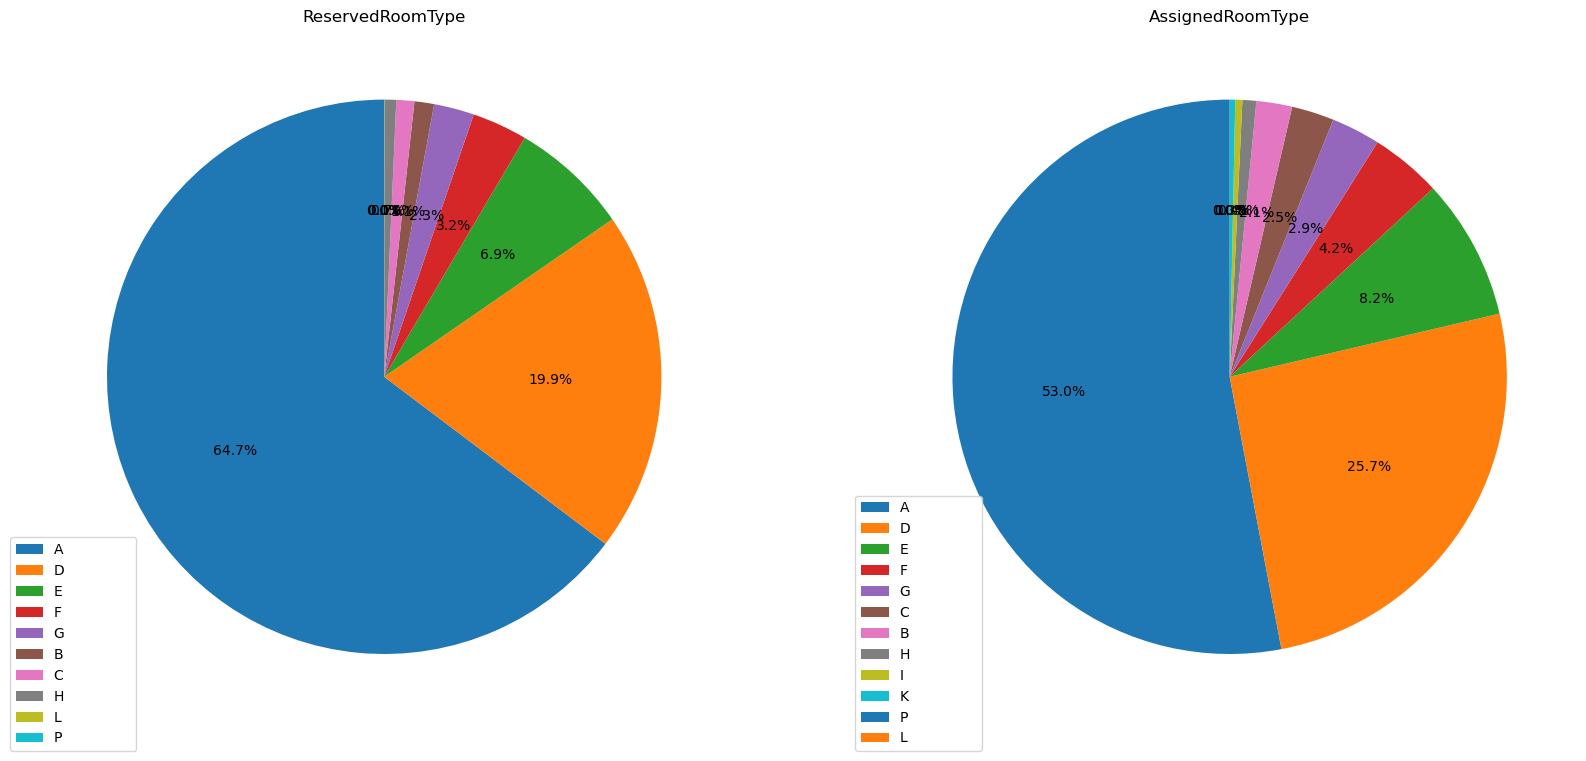

In [152]:
# Create fig and axes
fig, axes = plt.subplots(1, 2, figsize=(20, 9))
axes = axes.flatten()

# Define column names
cols = ['ReservedRoomType', 'AssignedRoomType']

# Plot histograms for each axe
for i in range(2):
    data_dict = string_profile[cols[i]]['distribution']
    labels = list(data_dict.keys())
    sizes = list(data_dict.values())
    
    axes[i].pie(sizes, labels=None, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(cols[i])
    axes[i].set_aspect('equal')
    axes[i].legend(labels, loc='lower left', bbox_to_anchor=(-0.05, -0.05))

plt.show()

✨ It seems like people didn't like to I and K room type since these two types don't exist in `ReservedRoomType`.    
✨ A is the room type that had the highest bookings. But when the hotel assigned the room for customers, the percent of this type drop approximately 10%, this maybe they ran out of these rooms.

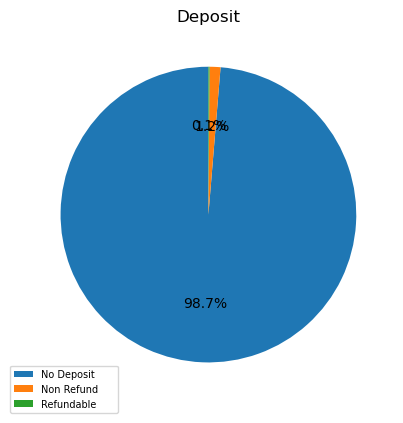

In [154]:
# Take out deposit data
deposit = str_df['DepositType'].value_counts().to_dict()
labels = list(deposit.keys())
sizes = list(deposit.values())

# Plot pie chart
plt.pie(sizes, labels=None, autopct='%1.1f%%', startangle=90, radius=1)
plt.title('Deposit')
plt.legend(labels, loc='lower left', bbox_to_anchor=(-0.05, -0.05), prop={'size': 7})
plt.show()

✨ Most of the data is no deposit type.